----

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data_visit=pd.read_csv('/datasets/visits_log_us.csv',nrows=359400,dtype={'Device':'category'},parse_dates=['End Ts','Start Ts'],)
data_orders=pd.read_csv('/datasets/orders_log_us.csv',nrows=50415,parse_dates=['Buy Ts'])
data_cost=pd.read_csv('/datasets/costs_us.csv')

Se descargan los archivos y se crea el dataset nuevo

In [3]:
data_visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


Se cambia el nombre de las columnas

In [4]:
data_visit['session_year']=data_visit['Start Ts'].dt.year
data_visit['session_month']=data_visit['Start Ts'].dt.month
data_visit['session_week']=data_visit['Start Ts'].dt.isocalendar().week
data_visit['session_date']=data_visit['Start Ts'].dt.date

In [5]:
print(data_visit.head(2))

    Device              End Ts  Source Id            Start Ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   

                    Uid  session_year  session_month  session_week  \
0  16879256277535980062          2017             12            51   
1    104060357244891740          2018              2             8   

  session_date  
0   2017-12-20  
1   2018-02-19  


     user_month  user_week session_date  n_users
0             1          1   2018-01-01      992
1             1          1   2018-01-02     1265
2             1          1   2018-01-03     1219
3             1          1   2018-01-04     1260
4             1          1   2018-01-05     1006
..          ...        ...          ...      ...
359          12         52   2017-12-27     1334
360          12         52   2017-12-28     1377
361          12         52   2017-12-29     1192
362          12         52   2017-12-30     1106
363          12         52   2017-12-31      732

[364 rows x 4 columns]


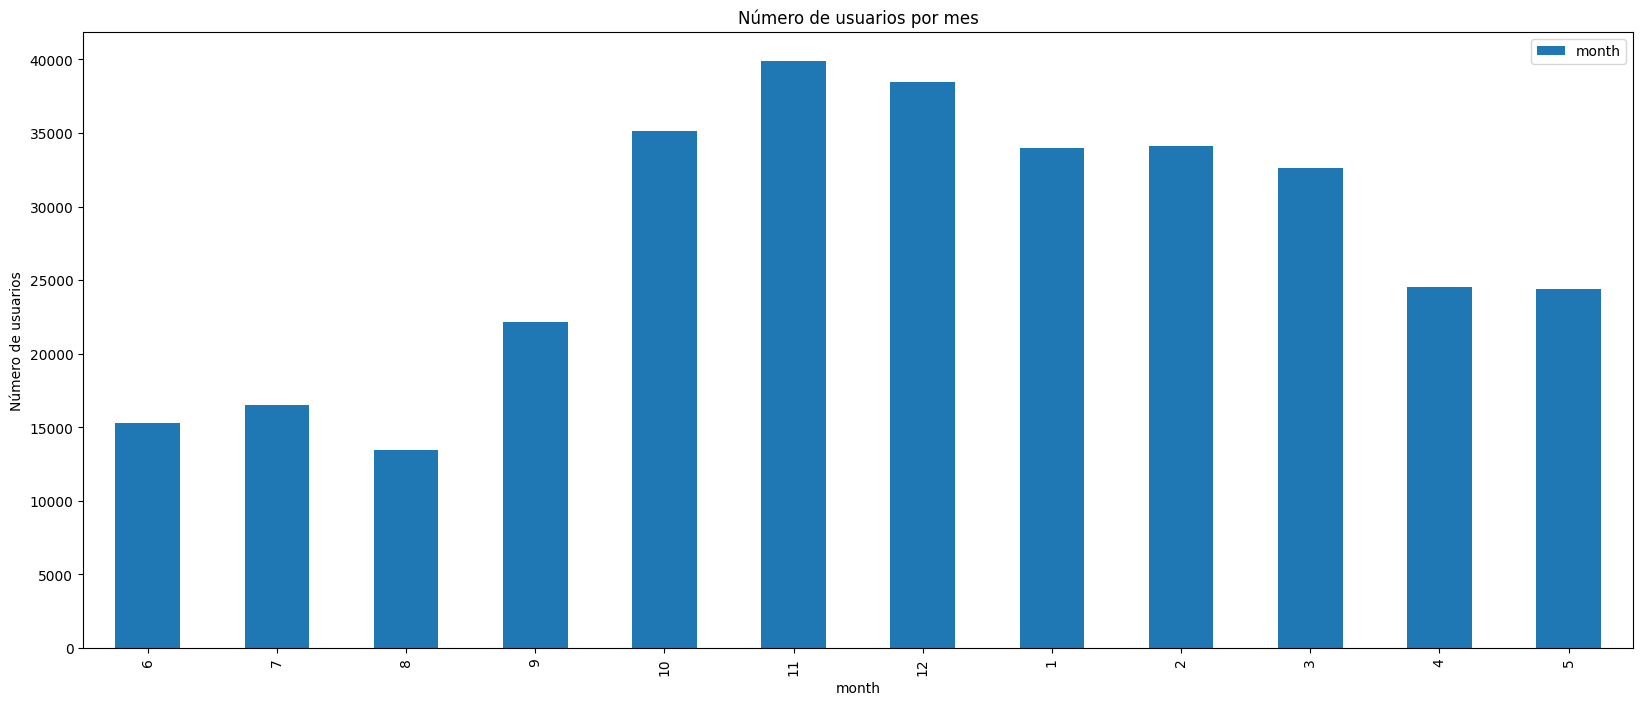

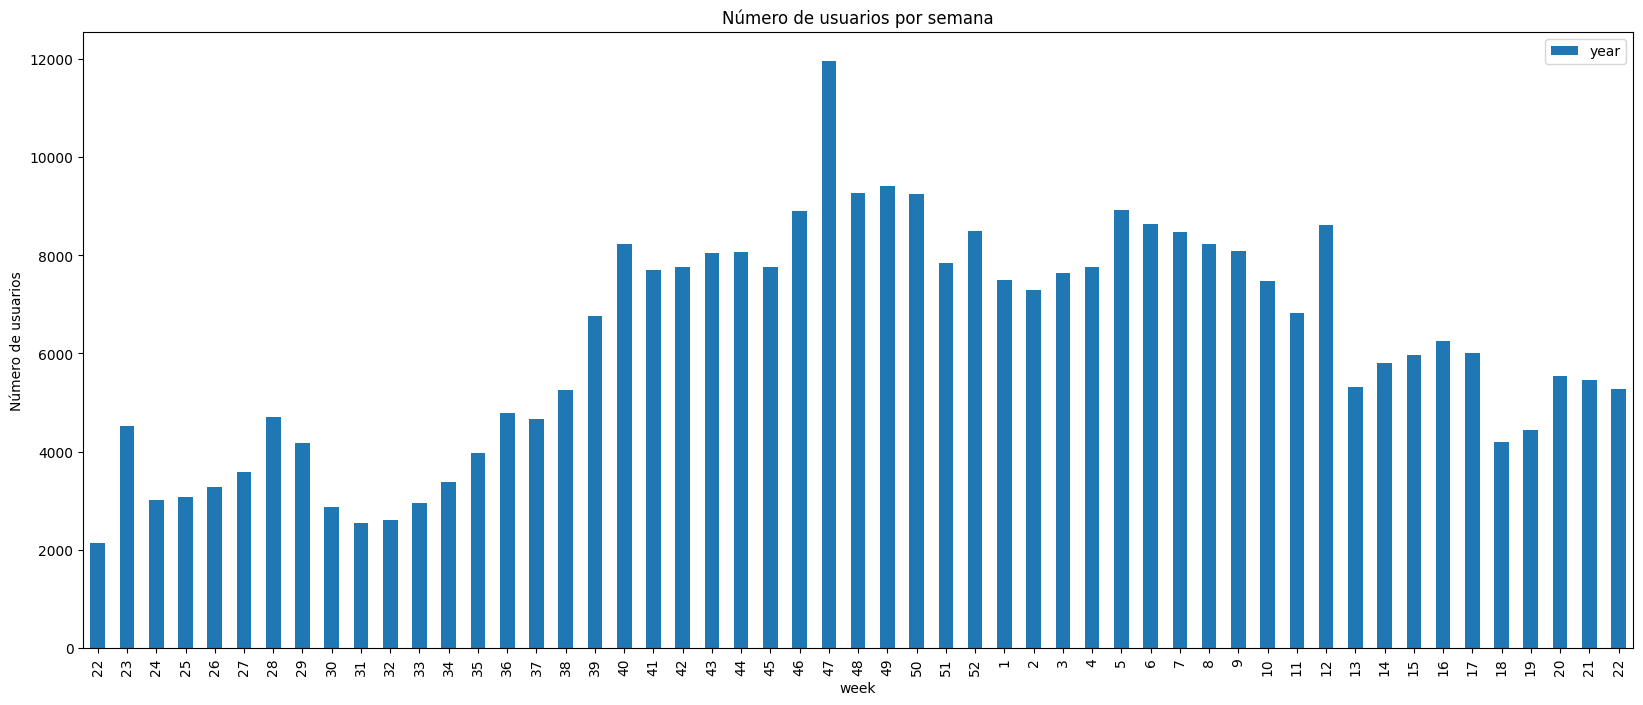

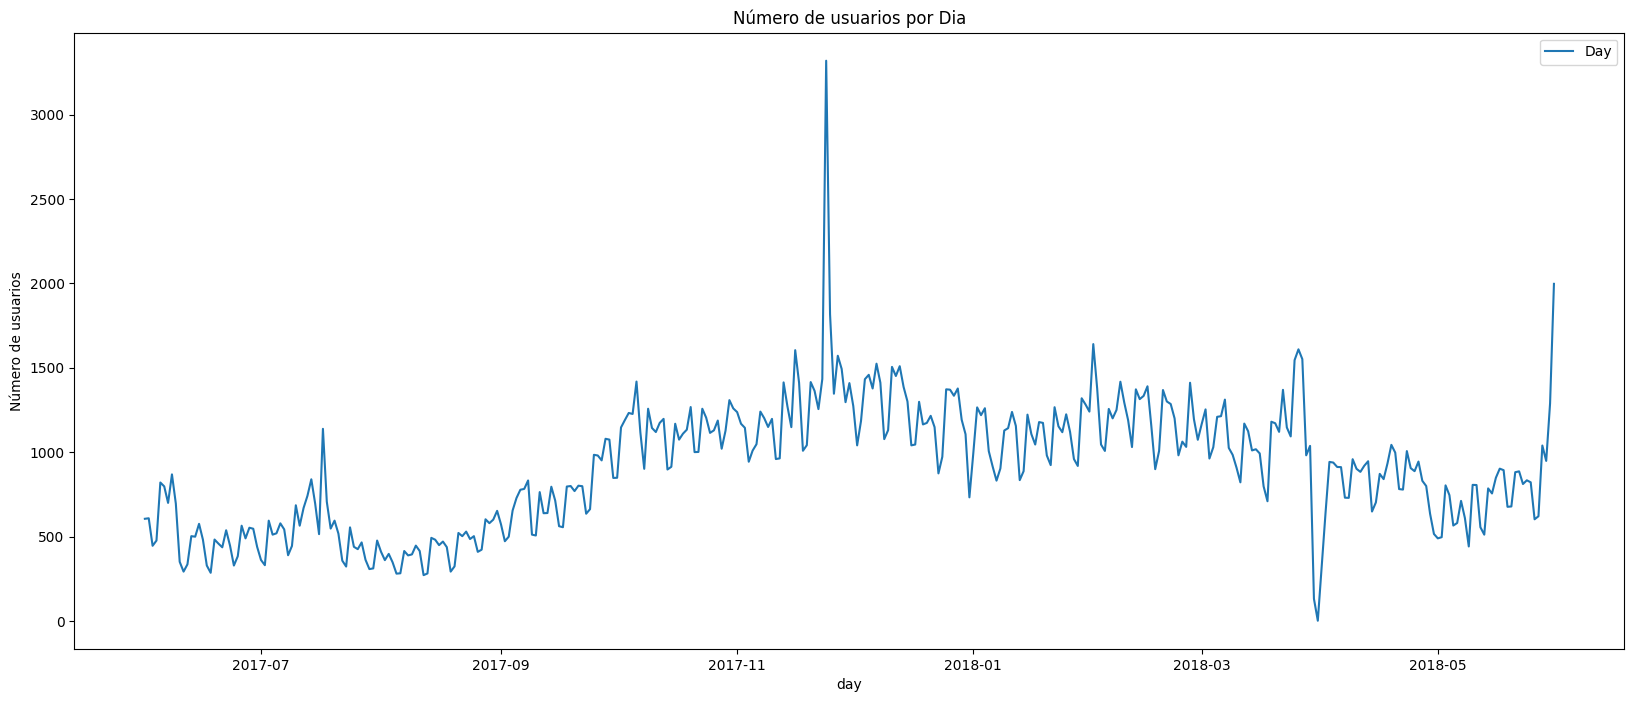

In [6]:
session_per_user=data_visit.groupby(['session_year','session_month','session_week','session_date']).agg({'Uid':['count','nunique']})
session_per_user.columns=['n_sessions','n_users']
session_per_user['session_per_user']=session_per_user['n_sessions']/session_per_user['n_users']

usuario_total=session_per_user.groupby(['session_month','session_week','session_date'])['n_users'].sum()
usuario_total=usuario_total.reset_index()
usuario_total.columns=['user_month','user_week','session_date','n_users']
                       
print(usuario_total)                       

total_usuarios_month=session_per_user.groupby(['session_year','session_month'])['n_users'].sum()
total_usuarios_month=total_usuarios_month.reset_index()
total_usuarios_month.columns=['user_year','user_month','n_users']

total_usuarios_week=session_per_user.groupby(['session_year','session_week'])['n_users'].sum()
total_usuarios_week=total_usuarios_week.reset_index()
total_usuarios_week.columns=['user_year','user_week','n_users']

total_usuarios_day=session_per_user.groupby(['session_date'])['n_users'].sum()
total_usuarios_day=total_usuarios_day.reset_index()
total_usuarios_day.columns=['user_day','n_users']



total_usuarios_month.plot(kind='bar',x='user_month',y=['n_users'],figsize=[20,8],xlabel='month',ylabel='Número de usuarios',title='Número de usuarios por mes')
plt.legend(['month'])
plt.show()



total_usuarios_week.plot(kind='bar',x='user_week', y=['n_users'],figsize=[20,8],xlabel='week',ylabel='Número de usuarios',title='Número de usuarios por semana')
plt.legend(['year','week'])
plt.show()

total_usuarios_day.plot(x='user_day',y=['n_users'],figsize=[20,8],xlabel='day',ylabel='Número de usuarios',title='Número de usuarios por Dia')
plt.legend(['Day'])
plt.show()




Para efectuar el analisis se obtiene el numero de sesiones, numero de usuarios y sesiones por usuario consolidado por mes en cada ano de la evaluacion. Se visualiza con la medicion de sesiones por usuario, que los usuarios pueden tener mas de una sesion.

In [7]:
data_visit['session_second']=(data_visit['End Ts']-data_visit['Start Ts']).dt.seconds
print(data_visit['session_second'].mean())

643.506488592098


La duracion promedio por sesion es de 643.5 segundos para cada usuario

<AxesSubplot:>

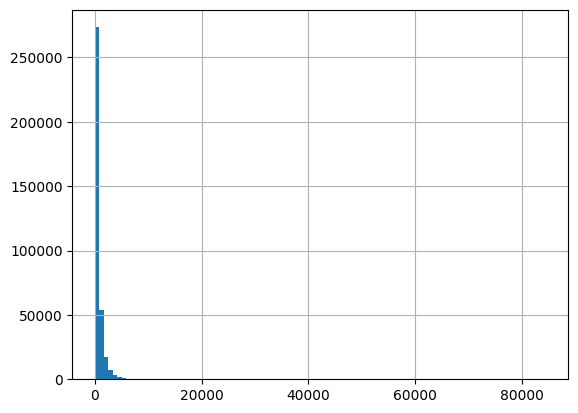

In [8]:
data_visit['session_second'].hist(bins=100)

Se grafica la frecuencia de la duracion por sesion, y no se visualiza una tendencia pues los datos estan muy dispersos.

In [9]:
print(data_visit['session_second'].mode())

0    60
dtype: int64


Debido a que no se haya una media real o que sea de influencia, se tiene en cuenta la moda, que seria de 60 segundos

In [10]:
dau_total=data_visit.groupby('session_date').agg({'Uid':'nunique'})
dau_total=dau_total.reset_index()
dau_total.columns=['date','Usuarios Activos']
print(dau_total.head(20))

          date  Usuarios Activos
0   2017-06-01               605
1   2017-06-02               608
2   2017-06-03               445
3   2017-06-04               476
4   2017-06-05               820
5   2017-06-06               797
6   2017-06-07               699
7   2017-06-08               868
8   2017-06-09               695
9   2017-06-10               350
10  2017-06-11               292
11  2017-06-12               335
12  2017-06-13               502
13  2017-06-14               499
14  2017-06-15               575
15  2017-06-16               481
16  2017-06-17               328
17  2017-06-18               285
18  2017-06-19               482
19  2017-06-20               458


Se calcula el numero de usuarios activos diarios, los cuales son de 907.

In [11]:
wau_total=data_visit.groupby(['session_year','session_week']).agg({'Uid':'nunique'})
wau_total=wau_total.reset_index()
wau_total.columns=['year','week','Usuarios Activos']
print(wau_total.head(20))


    year  week  Usuarios Activos
0   2017    22              2021
1   2017    23              4129
2   2017    24              2812
3   2017    25              2878
4   2017    26              3064
5   2017    27              3294
6   2017    28              4355
7   2017    29              3841
8   2017    30              2655
9   2017    31              2364
10  2017    32              2444
11  2017    33              2746
12  2017    34              3116
13  2017    35              3694
14  2017    36              4412
15  2017    37              4319
16  2017    38              4874
17  2017    39              6241
18  2017    40              7612
19  2017    41              7074


el numero de usuarios activos por semana es de 5716.

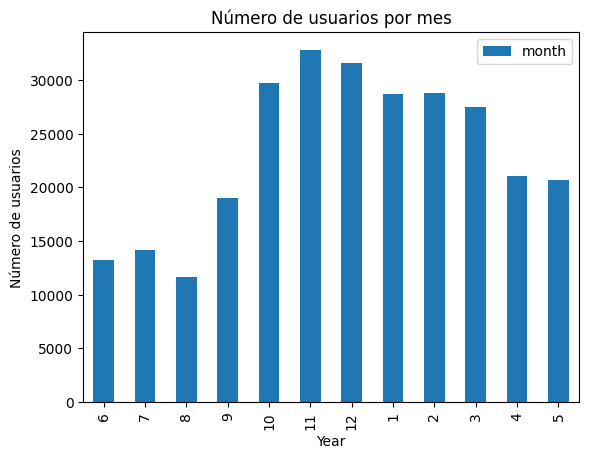

    year  month  Usuarios Activos
0   2017      6             13259
1   2017      7             14183
2   2017      8             11631
3   2017      9             18975
4   2017     10             29692
5   2017     11             32797
6   2017     12             31557
7   2018      1             28716
8   2018      2             28749
9   2018      3             27473
10  2018      4             21008
11  2018      5             20701


In [12]:
mau_total=data_visit.groupby(['session_year','session_month']).agg({'Uid':'nunique'})
mau_total=mau_total.reset_index()
mau_total.columns=['year','month','Usuarios Activos']
mau_total.plot(kind='bar',x='month',y=['Usuarios Activos'],xlabel='Year',ylabel='Número de usuarios',title='Número de usuarios por mes')
plt.legend(['month'])
plt.show()
print(mau_total.head(20))


Se tiene 23228 usuarios activos por mes.

In [13]:
dau_total_mean=dau_total=data_visit.groupby('session_date').agg({'Uid':'nunique'}).mean()
wau_total_mean=data_visit.groupby(['session_year','session_week']).agg({'Uid':'nunique'}).mean()
sticky_week=(dau_total_mean/wau_total_mean)*100
print(int(sticky_week))

15


Semanalmente regresa el 15% de usuarios de los que usaron con anterioridad la plataforma.

In [14]:
mau_total_mean=data_visit.groupby(['session_year','session_month']).agg({'Uid':'nunique'}).mean()
sticky_month=(dau_total_mean/mau_total_mean)*100
print(int(sticky_month))

3


El 3% de los usuarios regresa mensualmente

In [15]:
data_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [16]:
print(data_orders.head(2))

               Buy Ts  Revenue                   Uid
0 2017-06-01 00:10:00    17.00  10329302124590727494
1 2017-06-01 00:25:00     0.55  11627257723692907447


In [17]:
first_orders=data_orders.groupby(['Uid'])['Buy Ts'].min()
first_orders.name='first_orders'
data_orders=data_orders.join(first_orders,on='Uid') 



In [18]:

first_visit=data_visit.groupby(['Uid'])['Start Ts'].min()
first_visit.name='first_visit'
data_visit=data_visit.join(first_visit,on='Uid') 



In [19]:
print(data_visit.head(3))
print(data_orders.head(2))

    Device              End Ts  Source Id            Start Ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   

                    Uid  session_year  session_month  session_week  \
0  16879256277535980062          2017             12            51   
1    104060357244891740          2018              2             8   
2   7459035603376831527          2017              7            26   

  session_date  session_second         first_visit  
0   2017-12-20            1080 2017-12-20 17:20:00  
1   2018-02-19            1680 2018-02-19 16:53:00  
2   2017-07-01               0 2017-07-01 01:54:00  
               Buy Ts  Revenue                   Uid        first_orders
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00


In [20]:

conversion_customers=pd.merge(left=first_orders,right=first_visit,left_on=['Uid'],right_on=['Uid'],how='inner')
conversion_customers=conversion_customers.reset_index()
print(conversion_customers.head(10))


                Uid        first_orders         first_visit
0   313578113262317 2018-01-03 21:51:00 2017-09-18 22:49:00
1  1575281904278712 2017-06-03 10:13:00 2017-06-03 10:13:00
2  2429014661409475 2017-10-11 18:33:00 2017-10-11 17:14:00
3  2464366381792757 2018-01-28 15:54:00 2018-01-27 20:10:00
4  2551852515556206 2017-11-24 10:14:00 2017-11-24 10:14:00
5  3077748354309989 2018-03-03 12:33:00 2018-03-03 12:08:00
6  3605148382144603 2017-09-21 20:56:00 2017-08-15 21:54:00
7  3753586865891862 2018-03-03 13:50:00 2018-03-03 13:47:00
8  4808417689019433 2018-01-09 23:32:00 2018-01-09 23:10:00
9  4992223027560440 2018-04-04 13:54:00 2018-04-04 13:54:00


In [21]:
conversion_customers['conversion']=(conversion_customers['first_orders']-conversion_customers['first_visit']).dt.days
conversion_customers['first_order'] =conversion_customers['first_orders'].astype('datetime64[M]')
conversion_customers['first_order']=conversion_customers['first_order'].dt.strftime('%Y-%m')
conversion_customers.pivot_table(
  index='first_order',
 columns='conversion',
 values='Uid',
aggfunc='nunique',
)


conversion,0,1,2,3,4,5,6,7,8,9,...,346,347,348,349,352,354,355,357,362,363
first_order,,,,,,,,,,,,,,,,,,,,,
2017-06,1799.0,55.0,27.0,33.0,18.0,11.0,15.0,8.0,10.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07,1530.0,57.0,36.0,19.0,22.0,19.0,13.0,12.0,14.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,1095.0,26.0,11.0,12.0,14.0,10.0,9.0,7.0,5.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,1968.0,71.0,38.0,32.0,23.0,16.0,32.0,16.0,12.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10,3299.0,114.0,72.0,64.0,38.0,42.0,38.0,25.0,23.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11,2866.0,142.0,70.0,60.0,35.0,29.0,24.0,21.0,19.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12,2996.0,132.0,69.0,67.0,40.0,42.0,34.0,31.0,26.0,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,2318.0,88.0,54.0,36.0,35.0,26.0,20.0,19.0,18.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,2487.0,99.0,71.0,37.0,43.0,25.0,22.0,36.0,18.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Con gran participacion el mismo dia las personas hacen el registro y hacen su primera compra

In [22]:
first_order_customers=data_orders.groupby('Uid')['Buy Ts'].min()
first_order_customers.name='first_order_customers'
data_orders=data_orders.join(first_order_customers,on='Uid')


<AxesSubplot:title={'center':'Pedidos Realizados'}, xlabel='cohort_lifetime', ylabel='first_order_customers'>

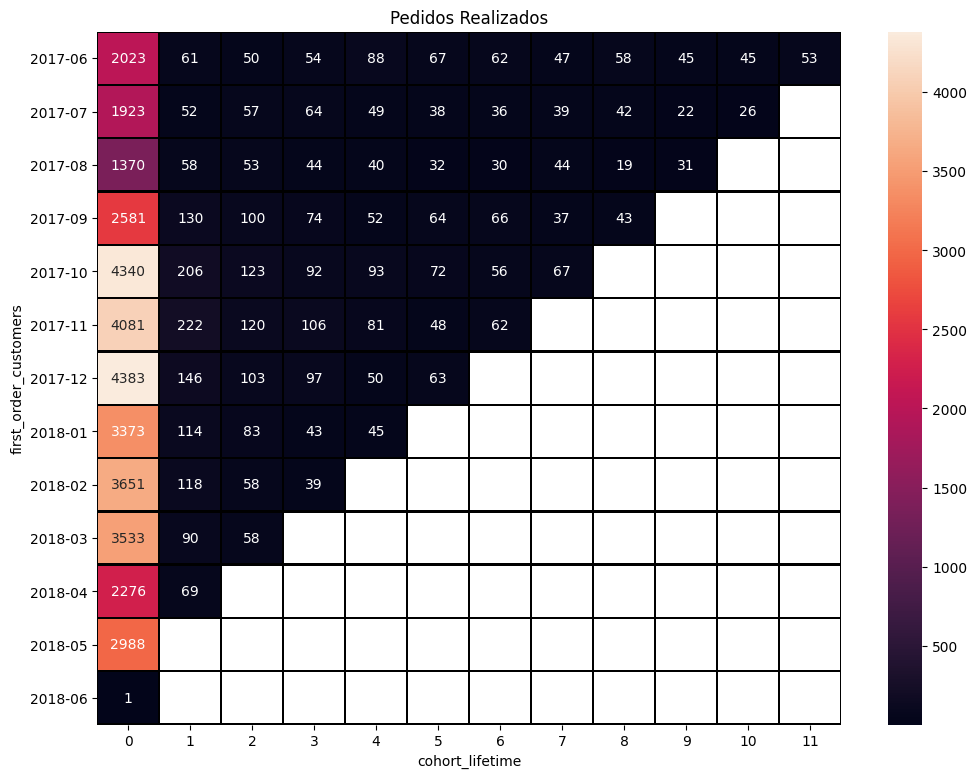

In [23]:
data_orders['first_order_customers']=data_orders['first_order_customers'].astype('datetime64[M]')
data_orders['order_month']=data_orders['Buy Ts'].astype('datetime64[M]')
order_group=data_orders.groupby(['first_order_customers']).agg({'Uid':['count','nunique']})
order_group.columns=['orders','customers']
data_orders_cohort=pd.merge(data_orders,order_group,on='first_order_customers')
data_orders_cohort['order_per_customer'] = (data_orders_cohort['orders']/ data_orders_cohort['customers'])
data_orders_cohort['cohort_lifetime'] = (data_orders_cohort['order_month']- data_orders_cohort['first_order_customers'])
data_orders_cohort['cohort_lifetime']= data_orders_cohort['cohort_lifetime']/ np.timedelta64(1, 'M')
data_orders_cohort['cohort_lifetime']= (data_orders_cohort['cohort_lifetime'].round().astype('int'))
data_orders_cohort['first_order_customers']=data_orders_cohort['first_order_customers'].dt.strftime('%Y-%m')
cohort=data_orders_cohort.groupby(['first_order_customers','cohort_lifetime']).agg({'Uid':'nunique'}).reset_index()
                                                                               

lifetime_pivot=cohort.pivot_table(index='first_order_customers',columns='cohort_lifetime',values='Uid')
plt.figure(figsize=(12, 9))
plt.title('Pedidos Realizados')
sns.heatmap(
 lifetime_pivot,
annot=True,
fmt='.0f',
linewidths=1,
linecolor='black',)


In [24]:
data_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Buy Ts                 50415 non-null  datetime64[ns]
 1   Revenue                50415 non-null  float64       
 2   Uid                    50415 non-null  uint64        
 3   first_orders           50415 non-null  datetime64[ns]
 4   first_order_customers  50415 non-null  datetime64[ns]
 5   order_month            50415 non-null  datetime64[ns]
dtypes: datetime64[ns](4), float64(1), uint64(1)
memory usage: 2.3 MB


In [25]:
first_orders_customer=data_orders.groupby('Uid')['Buy Ts'].min()
first_orders_customer.name='first_orders_customer'
data_orders=data_orders.join(first_orders_customer,on='Uid')

In [26]:
data_orders['first_orders_customer']=data_orders['first_orders_customer'].astype('datetime64[M]')
data_orders['month_customer']=data_orders['Buy Ts'].astype('datetime64[M]')
orders_group=data_orders.groupby(['first_orders_customer']).agg({'Uid':['count','nunique']})
orders_group.columns=['orders','customer']

<AxesSubplot:xlabel='cohort', ylabel='first_orders_customer'>

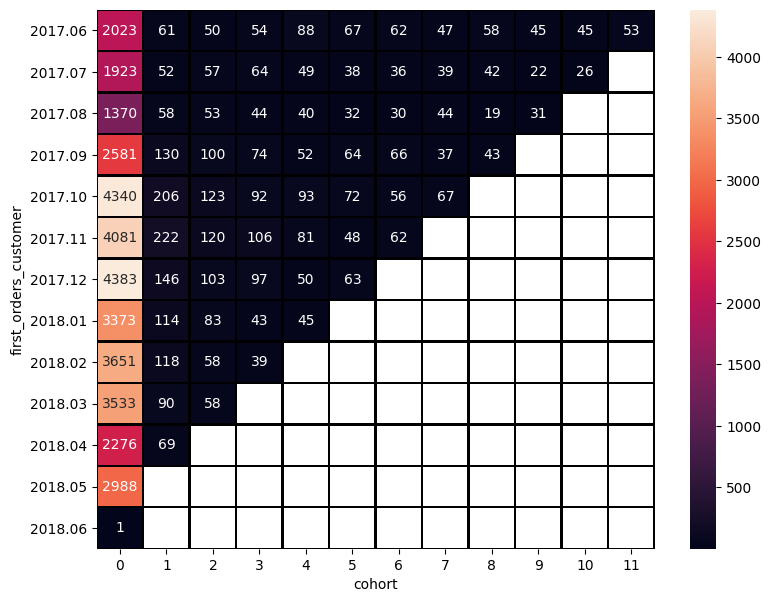

In [27]:
data_cohort_group=pd.merge(data_orders,orders_group,on='first_orders_customer')
data_cohort_group['order_per_customer']=data_cohort_group['orders']/data_cohort_group['customer']
data_cohort_group['cohort']=data_cohort_group['month_customer']-data_cohort_group['first_orders_customer']
data_cohort_group['cohort']=data_cohort_group['cohort']/np.timedelta64(1,'M')
data_cohort_group['cohort']=(data_cohort_group['cohort'].round().astype('int'))
data_cohort_group['first_orders_customer']= data_cohort_group['first_orders_customer'].dt.strftime('%Y.%m')
last_cohort=data_cohort_group.groupby(['first_orders_customer','cohort']).agg({'Uid':'nunique'}).reset_index()
mapa_cohort=last_cohort.pivot_table(index='first_orders_customer',columns='cohort',values='Uid',aggfunc='mean')
plt.figure(figsize=(9,7))
sns.heatmap(mapa_cohort,
       annot=True,fmt='.0f',linewidths=1,linecolor='black',   )



In [28]:
data_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Buy Ts                 50415 non-null  datetime64[ns]
 1   Revenue                50415 non-null  float64       
 2   Uid                    50415 non-null  uint64        
 3   first_orders           50415 non-null  datetime64[ns]
 4   first_order_customers  50415 non-null  datetime64[ns]
 5   order_month            50415 non-null  datetime64[ns]
 6   first_orders_customer  50415 non-null  datetime64[ns]
 7   month_customer         50415 non-null  datetime64[ns]
dtypes: datetime64[ns](6), float64(1), uint64(1)
memory usage: 3.1 MB


In [29]:
first_buy_cis=data_orders.groupby('Uid')['Buy Ts'].min()
first_buy_cis.name='first_buy_cis'
data_orders=data_orders.join(first_buy_cis,on='Uid')

<AxesSubplot:xlabel='cohort', ylabel='first_buy_cis'>

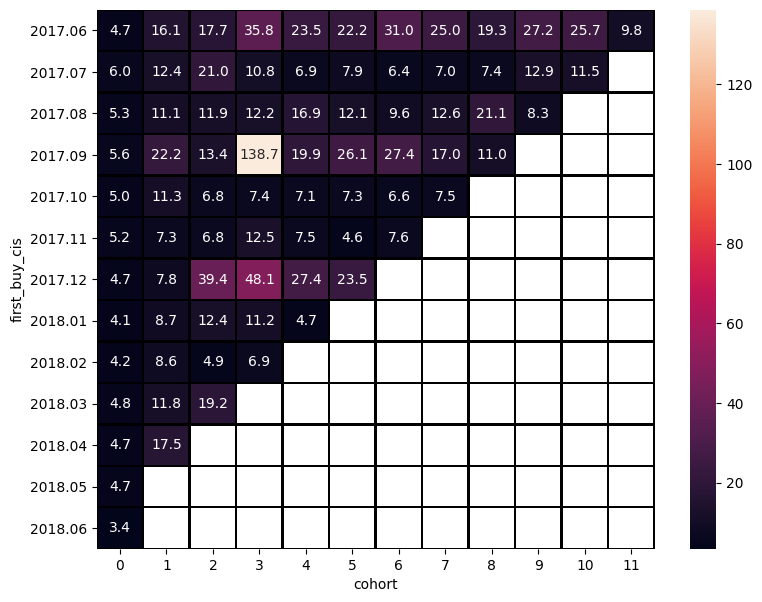

In [30]:
data_orders['first_buy_cis']=data_orders['first_buy_cis'].astype('datetime64[M]')
data_orders['month_buy']=data_orders['Buy Ts'].astype('datetime64[M]')
buy_cohort_user=data_orders.groupby(['first_buy_cis','month_buy']).agg({'Revenue':'sum','Uid':'nunique'})
buy_cohort_user['revenue_per_user']=buy_cohort_user['Revenue']/buy_cohort_user['Uid']
buy_cohort_user=buy_cohort_user.reset_index()
buy_cohort_user['cohort']= buy_cohort_user['month_buy']-buy_cohort_user['first_buy_cis']
buy_cohort_user['cohort']=buy_cohort_user['cohort']/np.timedelta64(1,'M')
buy_cohort_user['cohort']=buy_cohort_user['cohort'].round().astype('int')
buy_cohort_user['first_buy_cis']= buy_cohort_user['first_buy_cis'].dt.strftime('%Y.%m')
map_heat=buy_cohort_user.pivot_table(index='first_buy_cis',columns='cohort',values='revenue_per_user',aggfunc='mean')
plt.figure(figsize=(9,7))
sns.heatmap(map_heat,annot=True,fmt='.1f',linewidths=1,linecolor='black')

Una vez el cliente hace su primer pedido aumenta la frecuencia de compra

In [31]:
first_order_buy=data_orders.groupby('Uid')['Buy Ts'].min()
first_order_buy.name='first_order_buy'
data_orders=data_orders.join(first_order_buy,on='Uid')

<AxesSubplot:title={'center':'Tamaño promedio de compra del cliente'}, xlabel='cohort_lifetime', ylabel='first_order_buy'>

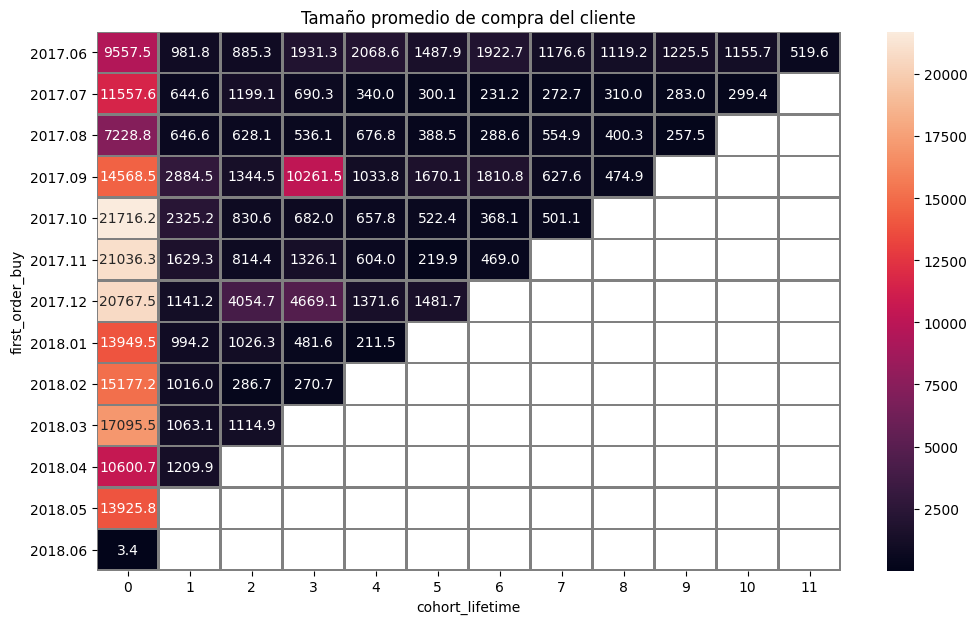

In [32]:
data_orders['first_order_buy']=data_orders['first_order_buy'].astype('datetime64[M]')
data_orders['buy_month']=data_orders['Buy Ts'].astype('datetime64[M]')
order_group_cohort=data_orders.groupby(['first_order_buy','buy_month']).agg({'Revenue':'sum','Uid':'nunique'})
order_group_cohort['revenue_per_user']=order_group_cohort['Revenue']/order_group_cohort['Uid']
order_group_cohort = order_group_cohort.reset_index()
order_group_cohort['cohort_lifetime'] = (order_group_cohort['buy_month'] - order_group_cohort['first_order_buy'])
order_group_cohort['cohort_lifetime'] = order_group_cohort['cohort_lifetime'] / np.timedelta64(1, 'M')
order_group_cohort['cohort_lifetime']=(order_group_cohort['cohort_lifetime'].round().astype('int'))
order_group_cohort['first_order_buy']= order_group_cohort['first_order_buy'].dt.strftime('%Y.%m')
revenue_per_user=order_group_cohort.pivot_table(index='first_order_buy',columns='cohort_lifetime',values='Revenue',aggfunc='mean')
plt.figure(figsize=(12, 7))
plt.title('Tamaño promedio de compra del cliente')
sns.heatmap(
    revenue_per_user,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
)

Se visualiza que el pedido de compra de mayor tamano es de 138.7, el resto de los paquetes en su mayoria no superan los 48.1

In [33]:
data_orders['order_month']=data_orders['Buy Ts'].astype('datetime64[M]')
first_order=data_orders.groupby('Uid').agg({'Buy Ts':'min'}).reset_index()
first_order.columns = ['Uid', 'first_order_month']
first_order['first_order_month']=first_order['first_order_month'].astype('datetime64[M]')
cohort_sizes = first_order.groupby('first_order_month').agg({'Uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
orders_last= pd.merge(data_orders,first_order, on='Uid')
cohorts = orders_last.groupby(['first_order_month','order_month']).agg({'Revenue': 'sum'}).reset_index()
reports = pd.merge(cohort_sizes, cohorts, on='first_order_month')
margin_rate = 0.5
reports['gp'] = reports['Revenue'] * margin_rate
reports['age'] = (reports['order_month'] - reports['first_order_month']) / np.timedelta64(1, 'M')
reports['age'] = reports['age'].round().astype('int')
reports['ltv'] = reports['gp'] / reports['n_buyers']
output = reports.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean').round(2)
output.fillna('')


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,2.36,0.24,0.22,0.48,0.51,0.37,0.48,0.29,0.28,0.3,0.29,0.13
2017-07-01,3.01,0.17,0.31,0.18,0.09,0.08,0.06,0.07,0.08,0.07,0.08,
2017-08-01,2.64,0.24,0.23,0.2,0.25,0.14,0.11,0.2,0.15,0.09,,
2017-09-01,2.82,0.56,0.26,1.99,0.2,0.32,0.35,0.12,0.09,,,
2017-10-01,2.50,0.27,0.1,0.08,0.08,0.06,0.04,0.06,,,,
2017-11-01,2.58,0.2,0.1,0.16,0.07,0.03,0.06,,,,,
2017-12-01,2.37,0.13,0.46,0.53,0.16,0.17,,,,,,
2018-01-01,2.07,0.15,0.15,0.07,0.03,,,,,,,
2018-02-01,2.08,0.14,0.04,0.04,,,,,,,,


In [34]:
lvt_pro=output.cumsum(axis=1).mean(axis=0)
output.cumsum(axis=1).mean(axis=0)


age
0     2.401538
1     2.700000
2     2.913000
3     3.347778
4     3.652500
5     3.988571
6     4.200000
7     4.548000
8     5.037500
9     4.633333
10    5.010000
11    5.950000
dtype: float64

Si se toman en cuenta el dinero que trae cada usuario es de 5.95

In [35]:
data_cost['month']=data_cost['dt'].astype('datetime64[M]')
monthly_costs = data_cost.groupby('month')['costs'].sum()
monthly_costs=monthly_costs.reset_index()
print(monthly_costs.head(12))




        month     costs
0  2017-06-01  18015.00
1  2017-07-01  18240.59
2  2017-08-01  14790.54
3  2017-09-01  24368.91
4  2017-10-01  36322.88
5  2017-11-01  37907.88
6  2017-12-01  38315.35
7  2018-01-01  33518.52
8  2018-02-01  32723.03
9  2018-03-01  30415.27
10 2018-04-01  22289.38
11 2018-05-01  22224.27


se consolida el costo mensual correspondiente a marketing

In [36]:
sources_group=data_cost.groupby(['source_id']).agg({'costs':'sum'}).reset_index()
print(sources_group.head(20))

   source_id      costs
0          1   20833.27
1          2   42806.04
2          3  141321.63
3          4   61073.60
4          5   51757.10
5          9    5517.49
6         10    5822.49


Se clasifica las fuentes de ingreso con su costo para analizar cual canal es mas efectivo

In [37]:
data_cost['period']=data_cost['dt'].astype('datetime64[D]')
sources_group=data_cost.groupby(['source_id','period']).agg({'costs':'sum'}).reset_index()
mean_source_cac=sources_group.groupby(['source_id'])['costs'].mean()
print(mean_source_cac)

source_id
1      57.391928
2     117.922975
3     389.315785
4     168.246832
5     142.189835
9      15.199697
10     16.039917
Name: costs, dtype: float64


In [42]:
first_visit=data_visit.sort_values(by='Start Ts').drop_duplicates(subset='Uid',keep='first')
source_union=pd.merge(right=first_visit,left=data_orders,on='Uid',how='left')


print(source_union)



                   Buy Ts  Revenue                   Uid        first_orders  \
0     2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00   
1     2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00   
2     2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00   
3     2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00   
4     2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00   
...                   ...      ...                   ...                 ...   
50410 2018-05-31 23:50:00     4.64  12296626599487328624 2018-05-31 23:50:00   
50411 2018-05-31 23:50:00     5.80  11369640365507475976 2018-05-31 23:50:00   
50412 2018-05-31 23:54:00     0.30   1786462140797698849 2018-05-31 23:54:00   
50413 2018-05-31 23:56:00     3.67   3993697860786194247 2018-05-31 23:56:00   
50414 2018-06-01 00:02:00     3.42     83872787173869366 2018-06-01 00:02:00   

      first_order_customers order_month

Se calcula el costo de adquisicion por cada fuente, se visualiza que la fuente 1 es la mas economica

In [43]:
mean_revenue = []

In [44]:
sources = source_union["Source Id"].unique()
for source in sources:
    df_filtrado = source_union[source_union["Source Id"] == source]
    df_filtrado=df_filtrado[df_filtrado['Source Id']==source]
    
    cohorts_sizes = df_filtrado.groupby('first_order_customers').agg({'Uid': 'nunique'}).reset_index()
    cohorts_sizes.columns = ['first_order_customers', 'n_buyers']
    cohorts = df_filtrado.groupby(['first_order_customers','order_month']).agg({'Revenue': 'sum'}).reset_index()
    join_filter=pd.merge(left=cohorts_sizes,right=cohorts,on=['first_order_customers'],how='inner')
    join_filter['age'] = (join_filter['order_month'] - join_filter['first_order_customers']) / np.timedelta64(1, 'M')
    join_filter['age'] = join_filter['age'].round().astype('int')
    join_filter['first_order_customers']= join_filter['first_order_customers'].dt.strftime('%Y.%m')
    join_filter['revenue_per_buyer'] = join_filter['Revenue'] / join_filter['n_buyers']
    margin_rate = 0.5
    join_filter['gp'] = join_filter['Revenue'] * margin_rate
    join_filter['ltv'] =join_filter['gp'] / join_filter['n_buyers']
    mean_revenue.append(join_filter)
    pivot_table = join_filter.pivot_table(
    index='first_order_customers', 
    columns='age', 
    values='ltv', 
    aggfunc='mean')
    print(pivot_table)
    

age                          0         1         2         3         4   \
first_order_customers                                                     
2017.06                3.628158  1.092053  1.103763  1.879579  2.134737   
2017.07                3.645937  0.547844  2.677313  0.753500  0.439156   
2017.08                3.746681  0.598628  0.505133  0.482389  0.519646   
2017.09                3.007357  0.900903  0.279648  0.462423  0.019383   
2017.10                3.009309  0.527912  0.122382  0.193912  0.031632   
2017.11                3.695448  0.286898  0.481790  0.446960  0.081636   
2017.12                2.292145  0.155514  0.144381  0.122855  0.013293   
2018.01                2.884412  0.045252  0.072269  0.486681  0.024643   
2018.02                2.343273  0.499927  0.033673  0.184764       NaN   
2018.03                4.671548  0.969413  0.394377       NaN       NaN   
2018.04                2.352291  0.134749       NaN       NaN       NaN   
2018.05                2.

age                           0         1         2         3         4  \
first_order_customers                                                     
2017.06                1.207105  0.058211       NaN       NaN       NaN   
2017.07                1.730686  0.015588       NaN  0.074804       NaN   
2017.08                2.498649  0.056081  0.165135       NaN       NaN   
2017.09                1.117035  0.032326  0.041163  0.095523  0.014186   
2017.10                1.309354  0.041675  0.005120  0.008469  0.019139   
2017.11                2.310898  0.026211  0.007148  0.092891  0.052344   
2017.12                1.895471  0.068294       NaN       NaN       NaN   
2018.01                1.549511  0.007609  0.034891       NaN       NaN   
2018.02                1.236870  0.057967  0.001992       NaN       NaN   
2018.03                1.716237  0.034167  0.016909       NaN       NaN   
2018.04                1.223972       NaN       NaN       NaN       NaN   
2018.05                1.

In [45]:

ltv_1 =mean_revenue[0].pivot_table(
    index='first_order_customers', 
    columns='age', 
    values='ltv', 
    aggfunc='mean').cumsum(axis=1)[5].mean()
romi_1 =ltv_1/57.3 
print(romi_1)


0.10481315220116562


In [46]:
ltv_2=mean_revenue[1].pivot_table(
    index='first_order_customers', 
    columns='age', 
    values='ltv', 
    aggfunc='mean').cumsum(axis=1)[5].mean()
romi_2 =ltv_2/117.9
print(romi_2)



0.06569785729981918


In [47]:
ltv_3=mean_revenue[2].pivot_table(
    index='first_order_customers', 
    columns='age', 
    values='ltv', 
    aggfunc='mean').cumsum(axis=1)[5].mean()
romi_3 =ltv_3/389.3 
print(romi_3)

0.007359554216638917


In [48]:
ltv_4=mean_revenue[3].pivot_table(
    index='first_order_customers', 
    columns='age', 
    values='ltv', 
    aggfunc='mean').cumsum(axis=1)[5].mean()
romi_4 =ltv_4/ 168.2
print(romi_4)

0.02778076331613887


In [49]:
ltv_5=mean_revenue[4].pivot_table(
    index='first_order_customers', 
    columns='age', 
    values='ltv', 
    aggfunc='mean').cumsum(axis=1)[5].mean()
romi_5 =ltv_5/142.18 
print(romi_5)

0.021213880532374767


In [50]:
ltv_9=mean_revenue[5].pivot_table(
    index='first_order_customers', 
    columns='age', 
    values='ltv', 
    aggfunc='mean').cumsum(axis=1)[5].mean()
romi_9 =ltv_9/15.2 
print(romi_9)

0.1912845613238562


In [51]:
ltv_10=mean_revenue[6].pivot_table(
    index='first_order_customers', 
    columns='age', 
    values='ltv', 
    aggfunc='mean').cumsum(axis=1)[5].mean()
romi_10 =ltv_10/16.0
print(romi_10)

0.12282295235210573


Se calcula el LVT por cada una de las fuentes para verificar cual es la que mas atrae dinero en los diferentes meses

Conclusion general: Este tipo de analisis le permite a nuestros clientes, las empresas considerar que tan rentable son las campanas de marketing, y cual de todos los canales presenta mayor exito y hace que los consumidores compren mas, de la misma forma podemos saber a que canales se les debe inyectar mas dinero para obtener mejores resultados y eliminar algunos canales de los cuales no se recibiria retorno de la inversion y no haria falta desperdiciar esfuerzos.